# SECTION 01. 머신러닝으로 AI 모델링하기

## 2. 선형회귀(Linear Regression) 

### 2)  선형회귀 실습하기

#### (1) 데이터 구성하기

In [44]:
import warnings
warnings.filterwarnings(action='ignore')

# 라이브러리 불러오기 (numpy, matplotlib)
import numpy as np
import matplotlib.pyplot as plt

# 렌덤 시드 고정
np.random.seed(2023)

In [2]:
# x는 1~10, y = 4*x+7인 학습 데이터 생성하기
x = []
y = []
for i in range(1,11): 
    x.append(i)
    y.append(4*i+7)

In [3]:
# 데이터 확인하기
print('x : ', x) 
print('y : ', y) 

x :  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y :  [11, 15, 19, 23, 27, 31, 35, 39, 43, 47]


#### (2) 선형회귀 학습 하기

In [4]:
# 선형회귀 라이브러리 불러오기
from sklearn.linear_model import LinearRegression
# 선형회귀 생성하기
reg = LinearRegression()

In [5]:
# 학습을 위해 1행10열 구성 데이터를 10행 1열로 변경하기
x = np.array(x).reshape(-1, 1)
# 데이터 확인하기
print("학습 데이터 확인")
print('x :' ,x)
print('x.shape : ', x.shape)

학습 데이터 확인
x : [[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
x.shape :  (10, 1)


In [6]:
# 학습하기
reg.fit(x,y)

LinearRegression()

In [7]:
# 산식 추정을 위한 기울기(coef) 및 절편(intercept) 확인하기
print(f'''기울기 및 절편 확인 coef = {reg.coef_}, intercept = {reg.intercept_} ''')

기울기 및 절편 확인 coef = [4.], intercept = 7.000000000000011 


In [8]:
# 절편과 기울기로 결과를 수동 계산하여 비교값 생성하기
coef_intercept = x * reg.coef_[0] + reg.intercept_
print("계산 결과")
print(coef_intercept)

계산 결과
[[11.]
 [15.]
 [19.]
 [23.]
 [27.]
 [31.]
 [35.]
 [39.]
 [43.]
 [47.]]


#### (3) 결과 비교를 위해 그래프 그리기

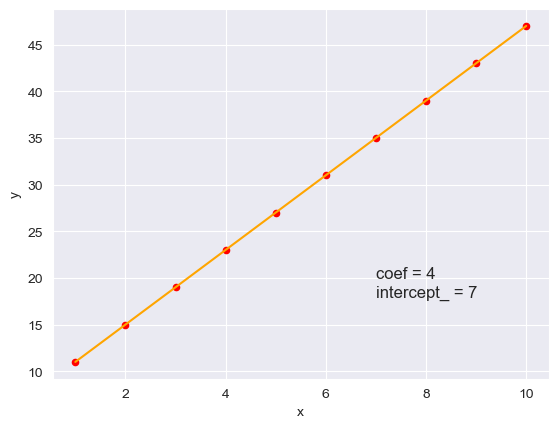

In [9]:
# scatter plot 그래프그리기
plt.scatter(x, y, color = 'r', s = 20)
# 선 그래프 그리기
plt.plot(x, coef_intercept, color = 'orange')
# coef 값 그래프 내에 텍스트 삽입하기
plt.text(7, 20, 'coef = %.0f'%reg.coef_[0], size = 12)
# intercept 값 그래프 내에 텍스트 삽입하기
plt.text(7, 18, 'intercept_ = %.0f'%reg.intercept_, size = 12)
# x축(가로) label 설정하기
plt.xlabel('x')
# y축(세로) label 설정하기
plt.ylabel('y')
plt.show()

### 3) 사례기반 선형회귀 모델링

#### (1) 데이터 전처리하기

In [10]:
# 판다스 라이브러리 불러오기
import pandas as pd 

In [11]:
# 데이터 불러오기
df = pd.read_csv("./dataset/국민건강보험공단_건강검진정보_20211229.CSV", encoding='cp949')

In [12]:
# pandas display 옵션 조정을 통해 View 범위 확장하기
pd.set_option('display.max_columns', None) # display 옵션을 통한 전체 열 확장

In [13]:
# 데이터 확인하기 (상위 5개)
df.head()

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,트리글리세라이드,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자
0,2020,1,36,1,9,165,60,72.1,1.2,1.5,1.0,1.0,127.0,79.0,90.0,188.0,58.0,58.0,118.0,15.0,1.0,1.1,21.0,27.0,21.0,1.0,0.0,0,NaN,NaN,2021-12-29
1,2020,2,27,2,13,150,65,81.0,0.8,0.8,1.0,1.0,110.0,73.0,87.0,NaN,NaN,NaN,NaN,12.7,1.0,0.5,18.0,15.0,15.0,1.0,0.0,0,NaN,NaN,2021-12-29
2,2020,3,11,2,12,155,55,70.0,0.6,0.7,1.0,1.0,123.0,80.0,102.0,NaN,NaN,NaN,NaN,12.8,1.0,0.7,27.0,25.0,7.0,1.0,0.0,0,NaN,NaN,2021-12-29
3,2020,4,31,1,13,160,70,90.8,1.0,1.0,1.0,2.0,134.0,84.0,146.0,NaN,NaN,NaN,NaN,16.4,1.0,1.2,65.0,97.0,72.0,1.0,0.0,1,0.0,0.0,2021-12-29
4,2020,5,41,2,12,155,50,75.2,1.5,1.2,1.0,1.0,144.0,89.0,110.0,220.0,171.0,53.0,133.0,12.4,1.0,0.7,18.0,17.0,14.0,1.0,0.0,0,NaN,NaN,2021-12-29


In [14]:
# 가설을 참고하여 데이터 일부 삭제하기 
# 시력, 청력, 치아 관련 칼럼은 관계없다는 가정으로 열 제거하기
df.drop(["치아우식증유무", '치석','시력(좌)', '시력(우)', '청력(좌)',  '청력(우)', '구강검진 수검여부'], axis=1, inplace=True)

In [15]:
# 기준년도 칼럼 확인하기 (모두 '2020' 동일 값이므로 '기준년도' 칼럼 삭제)
print("기준년도 칼럼 확인")
df.기준년도.value_counts() 

기준년도 칼럼 확인


기준년도
2020    1000000
Name: count, dtype: int64

In [16]:
# 가입자 일련번호 칼럼 확인하기 (모두 unique한 값으로 확인되어 '가입자 일련번호' 컬럼 삭제)
print("가입자 일련번호 칼럼 확인")
df["가입자 일련번호"].value_counts() 

가입자 일련번호 칼럼 확인


가입자 일련번호
1          1
666658     1
666660     1
666661     1
666662     1
          ..
333338     1
333339     1
333340     1
333341     1
1000000    1
Name: count, Length: 1000000, dtype: int64

In [17]:
# 성별코드 칼럼 확인하기
print("성별코드 칼럼 확인")
df.성별코드.value_counts()

성별코드 칼럼 확인


성별코드
1    510689
2    489311
Name: count, dtype: int64

In [18]:
# 불필요한 데이터 삭제하기
df.drop(["기준년도", '가입자 일련번호', '데이터 공개일자', '성별코드', '시도코드'], axis=1, inplace=True)

In [20]:
# 별도의 test 데이터 추출하기
test = df[df['LDL 콜레스테롤'].isnull()]
test

,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,트리글리세라이드,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부
1,13,150,65,81.0,110.0,73.0,87.0,NaN,NaN,NaN,NaN,12.7,1.0,0.5,18.0,15.0,15.0,1.0,0.0
2,12,155,55,70.0,123.0,80.0,102.0,NaN,NaN,NaN,NaN,12.8,1.0,0.7,27.0,25.0,7.0,1.0,0.0
3,13,160,70,90.8,134.0,84.0,146.0,NaN,NaN,NaN,NaN,16.4,1.0,1.2,65.0,97.0,72.0,1.0,0.0
7,13,160,65,92.0,131.0,79.0,93.0,NaN,NaN,NaN,NaN,15.9,1.0,1.2,18.0,17.0,19.0,3.0,0.0
9,14,150,45,71.2,124.0,83.0,85.0,NaN,NaN,NaN,NaN,13.2,1.0,0.6,22.0,11.0,10.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999988,16,165,60,81.0,116.0,72.0,96.0,NaN,NaN,NaN,NaN,12.8,1.0,1.0,21.0,16.0,13.0,2.0,1.0
999990,13,155,50,73.0,123.0,74.0,88.0,NaN,NaN,NaN,NaN,14.2,1.0,0.6,21.0,17.0,16.0,1.0,0.0
999993,14,170,65,86.0,150.0,90.0,76.0,NaN,NaN,NaN,NaN,13.0,3.0,1.0,29.0,18.0,25.0,2.0,1.0
999994,12,165,65,81.0,107.0,62.0,163.0,NaN,NaN,NaN,NaN,15.5,1.0,0.8,54.0,21.0,45.0,2.0,1.0


In [21]:
# NaN 데이터 행 단위로 삭제하기
train = df.dropna(axis=0)

In [22]:
# 학습 데이터 확인하기
print("학습 데이터 확인")
train.head(1)

학습 데이터 확인


,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,트리글리세라이드,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부
0,9,165,60,72.1,127.0,79.0,90.0,188.0,58.0,58.0,118.0,15.0,1.0,1.1,21.0,27.0,21.0,1.0,0.0


In [23]:
# 정답 데이터 생성하기
y = train['LDL 콜레스테롤']

In [24]:
# 학습 데이터 생성하기
x = train.drop('LDL 콜레스테롤', axis=1)

In [25]:
# validation set 추출을 위한 train_test_split 라이브러리 불러오기
from sklearn.model_selection import train_test_split

In [26]:
# scikit learn 예시 코드 비율 대로 불러오기
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.33, random_state=42)

In [27]:
# 학습/검증 데이터 확인하기
print("학습/검증 데이터 확인")
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

학습/검증 데이터 확인
(262749, 18) (262749,) (129415, 18) (129415,)


#### (2) 선형회귀 학습 및 추론하기

In [28]:
# 라이브러리 불러오기
from sklearn.linear_model import LinearRegression
# 모델 생성하기
reg = LinearRegression()
# 학습하기
reg.fit(X_train,y_train)

LinearRegression()

In [29]:
# 기울기와 절편 확인하기
print(f'''기울기 및 절편 확인 
기울기확인 coef = {reg.coef_}
절편확인 intercept = {reg.intercept_}''')

기울기 및 절편 확인 
기울기확인 coef = [ 0.10940698  0.01482723  0.03846911  0.04390587 -0.01075239 -0.00400628
 -0.00250987  0.96960416 -0.17471532 -0.7285143   0.14793707  0.02093034
  0.30343003 -0.01334047  0.01410607 -0.00855896  0.26395722 -0.70237274]
절편확인 intercept = -22.4242532304159


In [30]:
# 각각 데이터에 대해 가중치(or 회귀계수) 확인하기
print("전체에 대해서 가중치 확인")
for index ,columns in enumerate(X_train.columns):
    print(f"{columns} = {reg.coef_[index]}")

전체에 대해서 가중치 확인
연령대 코드(5세단위) = 0.10940697813896075
신장(5Cm단위) = 0.014827231815314534
체중(5Kg 단위) = 0.038469106481190334
허리둘레 = 0.04390587116960173
수축기 혈압 = -0.010752389060188852
이완기 혈압 = -0.004006282687837947
식전혈당(공복혈당) = -0.0025098717581257895
총 콜레스테롤 = 0.9696041571709837
트리글리세라이드 = -0.17471532187870537
HDL 콜레스테롤 = -0.7285142950308109
혈색소 = 0.14793707336766726
요단백 = 0.020930335819267818
혈청크레아티닌 = 0.303430029492159
(혈청지오티)AST = -0.013340474467645054
(혈청지오티)ALT = 0.014106072133288227
감마 지티피 = -0.008558956086861406
흡연상태 = 0.26395721807757994
음주여부 = -0.7023727367515201


#### (3) 예측을 통한 최종 검증하기

In [31]:
# 예측하기
y_pred = reg.predict(X_test)

In [32]:
# 결과 검증을 위해 MSE 라이브러리 불러오기
# 최종적으로는 RMSE를 사용하기
from sklearn.metrics import mean_squared_error

In [45]:
# mse 라이브러리 에서 RMSE 는 squared 옵션을 False로 설정하기
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

In [46]:
# 주요 Feature 삭제 전 rmse 확인하기
print(f'''주요 Feature 삭제 전 mse = {round(mse,3)}''')
print(f'''주요 Feature 삭제 전 rmse = {round(rmse,3)}''')

주요 Feature 삭제 전 mse = 1509.117
주요 Feature 삭제 전 rmse = 38.847


#### (4) 가중치의 의미 확인하기

In [36]:
# 주요 Feature 삭제를 위해 칼럼명 재확인하기
train.columns

Index(['연령대 코드(5세단위)', '신장(5Cm단위)', '체중(5Kg 단위)', '허리둘레', '수축기 혈압', '이완기 혈압',
       '식전혈당(공복혈당)', '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤', '혈색소',
       '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태', '음주여부'],
      dtype='object')

In [37]:
# 주요 Feature 삭제하기
x = x.drop(['총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤'],axis = 1)

In [38]:
# scikit learn 예시 코드 비율 대로 불러오기
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.33, random_state=42)

#### (5) 선형회귀 모델 재학습하기

In [39]:
# 선형회귀 재생성 및 학습하기
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [40]:
# 각각 데이터에 대해 가중치(or 회귀계수) 확인하기
print(f'''coef
{lr.coef_}
intercept
{lr.intercept_}''')

coef
[-2.42029175e+00 -3.33193684e-01 -2.06625915e-04 -6.04430610e-02
 -1.12762074e-01  2.60023059e-01 -1.40142661e-01  3.98600794e+00
 -1.43222741e+00 -3.09969695e-01 -5.96480461e-02  4.51315922e-02
 -2.61611789e-02 -3.08419949e+00 -1.22509065e+00]
intercept
164.22902318122038


#### (6) 가중치 비교하기

In [41]:
# 검증 데이터로 예측하기
y_pred = lr.predict(X_test)

In [42]:
# 각각 데이터에 대해 가중치(또는 회귀계수) 확인하기
print("가중치 확인")
for index ,columns in enumerate(X_train.columns):
    print(f"{columns} = {reg.coef_[index]}")

가중치 확인
연령대 코드(5세단위) = 0.10940697813896075
신장(5Cm단위) = 0.014827231815314534
체중(5Kg 단위) = 0.038469106481190334
허리둘레 = 0.04390587116960173
수축기 혈압 = -0.010752389060188852
이완기 혈압 = -0.004006282687837947
식전혈당(공복혈당) = -0.0025098717581257895
혈색소 = 0.9696041571709837
요단백 = -0.17471532187870537
혈청크레아티닌 = -0.7285142950308109
(혈청지오티)AST = 0.14793707336766726
(혈청지오티)ALT = 0.020930335819267818
감마 지티피 = 0.303430029492159
흡연상태 = -0.013340474467645054
음주여부 = 0.014106072133288227


In [47]:
# 주요 Feature 삭제 후 RMSE 확인하기
rmse_2 = mean_squared_error(y_test, y_pred, squared=False)

In [48]:
# 가중치가 큰 특성을 삭제 했을 때 영향을 많이 받는지 확인하기
print(f'''주요 Feature 삭제 후 rmse = {round(rmse_2,3)}''')

주요 Feature 삭제 후 rmse = 38.847


## 3. 로지스틱 회귀(Logistic Regression)

### 1) 로지스틱 회귀 이해하기

#### (1) 시그모이드 함수 만들기

In [49]:
# numpy 라이브러리 및 그래프 라이브러리 불러오기
import numpy as np
import matplotlib.pyplot as plt

In [50]:
# Sigmoid 함수 작성하기
def sigmoid(x):
    # nnumpy.exp() 함수는 밑이 자연상수 e인 지수함수(e^x)로 변환
    return 1 / (1 + np.exp(-x)) 

In [51]:
# 함수 테스트용 데이터 생성하기
test = np.array([-1, 0, 1])

In [52]:
# 작성된 함수 확인하기
print(sigmoid(test))

[0.26894142 0.5        0.73105858]


#### (2) 시그모이드 함수 그래프 그리기

In [53]:
# 그래프 적용을 위한 데이터 만들기
sigmoid_x = range(-6, 7)
sigmoid_y = sigmoid(np.array(sigmoid_x))

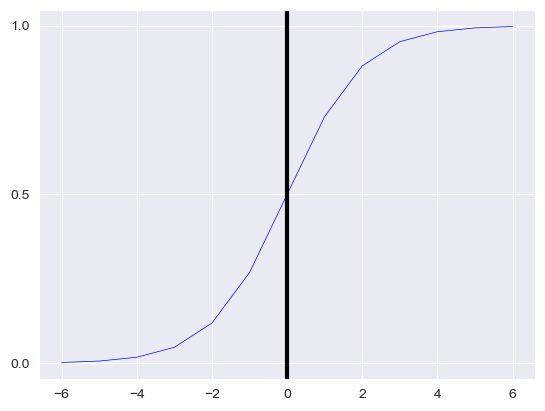

In [54]:
# 선 그래프 그리기
plt.plot(sigmoid_x , sigmoid_y, color = 'blue',linewidth = 0.5)
# 백 그라운드 모눈 종이 설정하기
plt.rcParams['axes.grid'] = True
# 라인 굵기 설정하기
plt.axvline(x=0, color='black', linewidth=3)
# y 축 범위 설정하기 
plt.yticks([0,0.5,1])
plt.show()

### 2) 로지스틱 회귀 실습하기

#### (1) 데이터 구성하기

In [55]:
# 학습 데이터 생성하기
x_train = [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
y_train = [0,0,0,0,0,0,0,1,1,1,1,1,1,1,1]
# 추론을 위한 데이터 생성하기
x_test = [0,1,2,18,19]
y_test =  [0,0,0,1,1]

# 학습 데이터에 대해 numpy로 변경 및 행을 열로 변경하기
x_train = np.array(x_train).reshape([-1,1])
y_train = np.array(y_train)
# 추론 데이터에 대해 numpy로 변경 및 행을 열로 변경하기
x_test = np.array(x_test).reshape([-1,1])
y_test = np.array(y_test)

In [56]:
# 데이터 확인하기
print(x_train)
print(y_train)

[[ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]]
[0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]


#### (2) 로지스틱 회귀 학습 하기

In [57]:
#로지스틱 회귀 라이브러리 불러오기
from sklearn.linear_model import LogisticRegression

In [58]:
# 로지스틱 회귀 생성하기
logi_reg = LogisticRegression()

In [59]:
# 학습하기
logi_reg.fit(x_train, y_train)

LogisticRegression()

In [60]:
# 역산을 위한 기울기와 절편이 있는지 확인하기
print('intercept:', logi_reg.intercept_)
print('coef:', logi_reg.coef_)

intercept: [-11.34176791]
coef: [[1.19388731]]


#### (3) 로지스틱 회귀 그래프 만들기


In [61]:
# 기울기와 절편을 수동으로 결과 만들기
odd = [] # 
for i in x_train:
    odd.append((logi_reg.coef_* i) + logi_reg.intercept_)
    
sigmoid_y= sigmoid(np.array(odd))
sigmoid_y = sigmoid_y.reshape(-1,1)

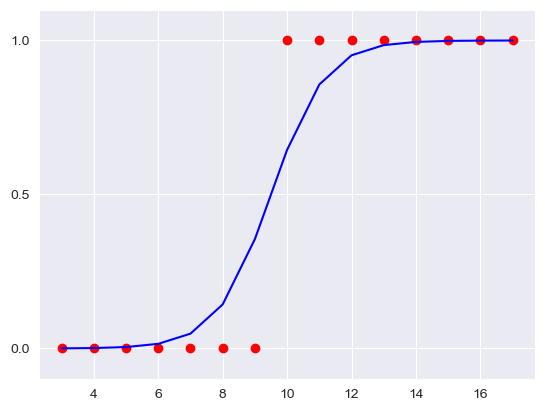

In [70]:
# 역산된 그래프 표시하기
plt.scatter(x_train, y_train,color='red')
plt.plot(np.array(x_train), sigmoid_y, color='blue')
plt.rcParams['axes.grid'] = True 
plt.yticks([0,0.5,1])
plt.ylim([-0.1, 1.1]) # y축의 범위: [Ymin, Ymax]     
plt.show()

### 3) 로지스틱 회귀와 선형회귀 비교하기

#### (1) 선형회귀 모델링하기

In [71]:
# 선형회귀 함수 불러오기
from sklearn.linear_model import LinearRegression
# 선형회귀 생성하기
lr = LinearRegression()
# 학습하기
lr.fit(x_train,y_train)

LinearRegression()

In [72]:
# 수식 완성을 위한 coef 와 intercept 확인하기
print('intercept:', lr.intercept_)
print('coef:', lr.coef_)

intercept: -0.4666666666666671
coef: [0.1]


#### (2) 선형회귀 모델과 로지스틱 회귀 모델 비교하기

In [73]:
coef_intercept = x_train * lr.coef_ + lr.intercept_

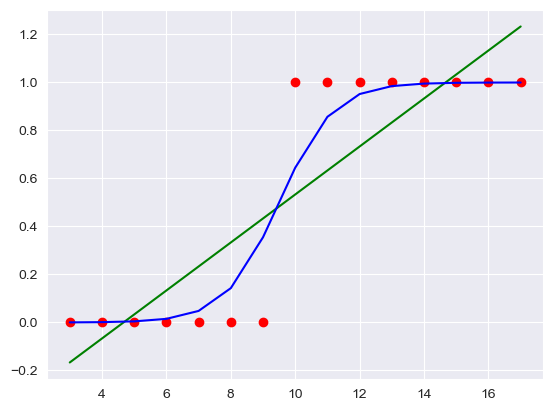

1.0
0.39814814814814703


In [74]:
plt.scatter(x_train, y_train,color='red')
plt.plot(np.array(x_train), coef_intercept, color='green')
plt.plot(np.array(x_train), sigmoid_y, color='blue')
plt.rcParams['axes.grid'] = True
plt.show()
print(logi_reg.score(x_test,y_test))
print(lr.score(x_test,y_test))

### [확인 문제]

In [75]:
# 문제 01. 정답 
logi_pred = logi_reg.predict(np.array(9.5).reshape(-1,1))
logi_pred

array([1])

In [76]:
lr_pred = lr.predict(np.array(9.5).reshape(-1,1))
round(lr_pred[0])

0

## 4. 의사결정나무(Decision tree)

### 2) 의사결정나무 실습하기

#### (1) 데이터 준비하기

In [77]:
# 라이브러리 불러오기 (numpy, pandas, train_test_split)
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [78]:
# 데이터 불러오기
df = pd.read_csv("./dataset/국민건강보험공단_건강검진정보_20211229.CSV", encoding = 'cp949')
# 트리 예시를 만들기 위해서 일부 특성만 추출
sample_df = df[['신장(5Cm단위)','성별코드', '체중(5Kg 단위)','음주여부']]

In [79]:
# 샘플 데이터 중 상위 10개 추출하기
sample_df[:10]

,신장(5Cm단위),성별코드,체중(5Kg 단위),음주여부
0,165,1,60,0.0
1,150,2,65,0.0
2,155,2,55,0.0
3,160,1,70,0.0
4,155,2,50,0.0
5,185,1,85,1.0
6,165,1,80,1.0
7,160,1,65,0.0
8,150,2,50,0.0
9,150,2,45,0.0


#### (2) 데이터 전처리하기

In [80]:
# info 정보로 결측치(Null) 확인하기
print("Info 정보 확인")
sample_df.info()

Info 정보 확인
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   신장(5Cm단위)   1000000 non-null  int64  
 1   성별코드        1000000 non-null  int64  
 2   체중(5Kg 단위)  1000000 non-null  int64  
 3   음주여부        999804 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 30.5 MB


In [81]:
# 100만개 데이터 중 결측치 196개, 결측치가 포함된 행 삭제하기
sample = sample_df.dropna() 

In [82]:
# 결측치(Null) 다시 확인하기
print("Drop 후 Info 정보 확인")
sample.info()

Drop 후 Info 정보 확인
<class 'pandas.core.frame.DataFrame'>
Index: 999804 entries, 0 to 999999
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   신장(5Cm단위)   999804 non-null  int64  
 1   성별코드        999804 non-null  int64  
 2   체중(5Kg 단위)  999804 non-null  int64  
 3   음주여부        999804 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 38.1 MB


In [83]:
# 원-핫 인코딩을 위해 데이터를 object 형태로 변경하기
sample = sample.astype('str')

In [84]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999804 entries, 0 to 999999
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   신장(5Cm단위)   999804 non-null  object
 1   성별코드        999804 non-null  object
 2   체중(5Kg 단위)  999804 non-null  object
 3   음주여부        999804 non-null  object
dtypes: object(4)
memory usage: 38.1+ MB


In [85]:
sample.head()

,신장(5Cm단위),성별코드,체중(5Kg 단위),음주여부
0,165,1,60,0.0
1,150,2,65,0.0
2,155,2,55,0.0
3,160,1,70,0.0
4,155,2,50,0.0


In [86]:
# label(결과, Y) 생성하기
y=sample.음주여부

In [87]:
# 음주 여부 학습 데이터 구성하기
X=sample.drop('음주여부', axis=1)

In [88]:
# label 데이터의 편향성 확인하기
y.value_counts()

음주여부
1.0    584685
0.0    415119
Name: count, dtype: int64

In [89]:
# 학습/검증 데이터 분리하기
x_train, x_valid, y_train, y_valid = train_test_split(
    X, y,
    test_size=0.2,
    shuffle=True,
    random_state=34
)

#### (3) 의사결정나무 모델링하기

In [90]:
# 의사결정나무 모델 불러오기
from sklearn.tree import DecisionTreeClassifier

In [91]:
# 의사결정나무 모델 생성하기
dt = DecisionTreeClassifier(random_state = 1001, 
                            max_depth=2
                           ) 

In [92]:
# 의사결정나무 학습하기
dt_model = dt.fit(x_train, y_train)

In [93]:
# 학습 데이터 정확도 확인하기
print("학습 정확도 = ", dt_model.score(x_train, y_train))

학습 정확도 =  0.6622549675373792


In [94]:
# 검증 데이터 정확도 확인하기
print("검증 정확도 = ", dt_model.score(x_valid, y_valid))

검증 정확도 =  0.6618390586164302


#### (4) 의사결정나무 그래프 그리기

In [95]:
# 그래프 라이브러리(matplotlib.pyplot) 불러오기
import matplotlib.pyplot as plt

In [98]:
# 트리 모양 그래프 작성을 위한 라이브러리 설치하기
!pip install graphviz

In [99]:
# 그래프 라이브러리(grphviz) 불러오기
import graphviz
# 사이킷런의 graphviz 지원 모듈 불러오기
from sklearn.tree import export_graphviz
# 그래프 생성하기
tree_graph = graphviz.Source(export_graphviz(dt_model,
                                class_names=["X","O"],
                                feature_names=[ 'height', 'sex','weight'],
                                impurity=True,
                                filled=True))

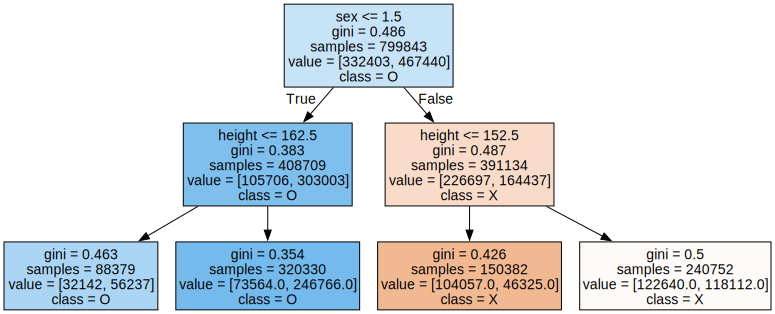

In [100]:
# 그래프 출력하기
# (참고) 에러 발생시 사이트 참조 : https://highschoolfree.tistory.com/76
tree_graph

In [101]:
# 그래프 파일 저장하기
tree_graph.render('tree_depth5', format="png")

'tree_depth5.png'

### 3) 불순도 알아보기

In [102]:
# 불순도 함수 생성하기
def gini(x):
    n = x.sum() 
    gini_sum = 0
    for key in x.keys():
        gini_sum = gini_sum  +  (x[key] / n ) * (x[key] / n )
    gini = 1 - gini_sum
    return gini

In [103]:
# 데이터 준비하기(불순도 예시)
과일바구니1 = ['사과']*9
과일바구니2 = ['사과', '바나나','사과', '바나나','바나나','바나나', '복숭아','복숭아','복숭아']
과일바구니3 = ['사과', '바나나','사과', '바나나','사과','복숭아', '복숭아','사과','복숭아']

In [104]:
print(round(gini(pd.DataFrame(과일바구니1).value_counts()),3))
print(round(gini(pd.DataFrame(과일바구니2).value_counts()),3))
print(round(gini(pd.DataFrame(과일바구니3).value_counts()),3))

0.0
0.642
0.642


### [확인 문제]

#### 1. 앞에서 활용했던 데이터를 이용하여 max_depth 파라미터를 1,15,30으로 각각의 모델을 만들어 보고 validation Score가 가장 작은 max_depth 수치를 작성하시오.(단, random_state는 1001 고정)


In [105]:
#for 문제 직접 리스트를 넣어서 구현하기
for depth in [1,15,30]:
    dt = DecisionTreeClassifier(random_state = 1001, 
                            max_depth=depth,
                           ) 
    dt_model = dt.fit(x_train, y_train)
    print(f'''max_depth {depth}일때 train 정확도{dt_model.score(x_train, y_train):.2f}, validation 정확도{dt_model.score(x_valid, y_valid):.2f}''')

max_depth 1일때 train 정확도0.66, validation 정확도0.66
max_depth 15일때 train 정확도0.68, validation 정확도0.68
max_depth 30일때 train 정확도0.68, validation 정확도0.68


#### 2. max_feature 파라미터를 1,2,3으로 각각 모델을 만들고 validation Score가 가장 높은 max_feature를 작성하세요. (단, random_state는 1001로 고정하고, max_depth에 대해 앞에서 가장 작은 max_depth 고정 후 결과 산출)

In [106]:
# 리스트를 별도로 만들어서 max_feature 변경하고 결과 산출
repeat_list = [1,2,3]
for feature in repeat_list:
    dt = DecisionTreeClassifier(random_state = 1001,
                                max_depth=1,
                                max_features = feature,
                           )
    dt_model = dt.fit(x_train, y_train)
    print(f'''max_feature {feature}일때 train 정확도{dt_model.score(x_train, y_train):.2f}, validation 정확도{dt_model.score(x_valid, y_valid):.2f}''')

max_feature 1일때 train 정확도0.67, validation 정확도0.67
max_feature 2일때 train 정확도0.66, validation 정확도0.66
max_feature 3일때 train 정확도0.66, validation 정확도0.66


## 6. 랜덤포레스트(Random Forest)

### 2) 랜덤포레스트 실습하기

#### (1) 데이터 준비하기

In [ ]:
# tensorflow 라이브러리 설치하기
#!pip install tensorflow --user

In [107]:
# tensorflow에서 제공하는 데이터셋 mnist 불러오기
from tensorflow.keras.datasets.mnist import load_data

In [108]:
# load_data로 데이터 할당하기
(x_train, y_train), (x_test, y_test) = load_data()

In [109]:
# 손 글씨 데이터는 이미지라 3차원 행렬
# 28x28 픽셀, 60000개의 테스트 데이터셋
print("변경 전 = ",x_train.shape)

변경 전 =  (60000, 28, 28)


In [110]:
# 학습을 위해 3차원 행렬을 2차원으로 변경하기
# 784 (28 * 28) 개의 요소로 이루어진 배열
X_train = x_train.reshape(-1, 784) 
X_test = x_test.reshape(-1, 784)

In [111]:
# 변경 결과 확인하기
print("변경 후 = ",X_train.shape)

변경 후 =  (60000, 784)


#### (2) 의사결정나무 모델링하기

In [112]:
# 필요 라이브러리 불러오기(의사결정나무, 랜덤포레스트)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [113]:
# 의사결정나무 학습하기
dct = DecisionTreeClassifier(random_state=0)
dct.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [114]:
# 의사결정나무 결과확인하기
acc_train_dct = dct.score(X_train,y_train)
acc_test_dct = dct.score(X_test,y_test)

In [115]:
print(f'''학습결과 = {acc_train_dct},검증결과 = {acc_test_dct} ''')

학습결과 = 1.0,검증결과 = 0.8785 


#### (3) 랜덤포레스트 모델링 및 결과 비교하기

In [116]:
# 랜덤포레스트 학습하기
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [117]:
# 랜덤포레스트 결과 보기
acc_train_rfc = rfc.score(X_train,y_train)
acc_test_rfc = rfc.score(X_test,y_test)

In [118]:
# 학습 결과 수치로 출력하기
print(f"""의사결정나무: train_acc = {round(acc_train_dct,3)}, test_acc = {round(acc_test_dct,3)}""")
print(f"""랜덤포레스트: train_acc = {round(acc_train_rfc,3)}, test_acc = {round(acc_test_rfc,3)}""")

의사결정나무: train_acc = 1.0, test_acc = 0.878
랜덤포레스트: train_acc = 1.0, test_acc = 0.969


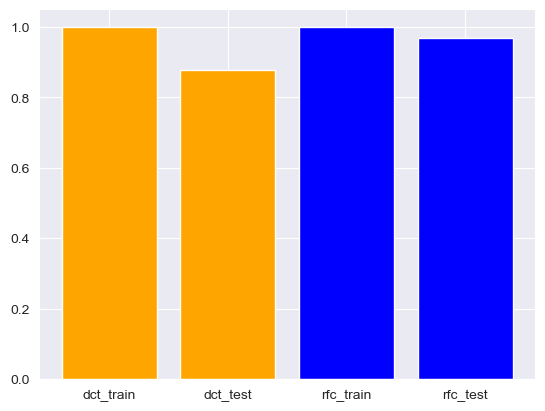

In [119]:
# 랜덤포레스트 결과를 토대로 비교 그래프 그리기
import matplotlib.pyplot as plt
# x 축 정의하기
acc_list_x = ['dct_train', 'dct_test', 'rfc_train', 'rfc_test']
# y 축 정의
acc_list_y = [acc_train_dct, acc_test_dct, acc_train_rfc, acc_test_rfc]
# 막대그래프 차트 색 정의하기
colors = ['orange', 'orange' , 'blue', 'blue']
# 막대그래프 설정하기
plt.bar(acc_list_x, acc_list_y, color=colors)
# 화면 출력하기
plt.show()

### 3) 랜덤포레스트와 의사결정나무 비교하기

In [ ]:
# 의사결정나무 결과와 동일하게 랜덤포레스트 구성하기
rft = RandomForestClassifier(
    random_state=0, 
    # 나무 개수를 1개로 설정하기
    n_estimators=1,
    # max_feature는 의사결정나무 기준으로 변경하기
    max_features=None,
    # 부트스트랩 샘플링은 OFF하기
    bootstrap=False,
)
rft.fit(X_train, y_train)

In [ ]:
# 학습 결과 저장하기
acc_train_rfc = rft.score(X_train,y_train)
acc_test_rfc = rft.score(X_test,y_test)
acc_train_dct = dct.score(X_train,y_train)
acc_test_dct = dct.score(X_test,y_test)

In [ ]:
#의사결정나무 & 랜덤포레스트가 유사한 결과를 출력하는지 비교하기
print(f"""의사결정나무: train_acc = {round(acc_train_dct,3)}, test_acc = {round(acc_test_dct,3)}""")
print(f"""랜덤포레스트: train_acc = {round(acc_train_rfc,3)}, test_acc = {round(acc_test_rfc,3)}""")

### [확인 문제]

#### 1. Max_features 의 값을 40, 50, 60 으로 변경해보고 가장 좋은 결과값을 작성 하세요. (단, random_state는 0으로 고정)

In [ ]:
max_features = [40,50,60]
for max_feature in max_features:
    print(max_feature)
    rfc = RandomForestClassifier(max_features = max_feature,
                                 n_jobs= -1, 
                                 random_state = 0)
    rfc.fit(X_train, y_train)
    acc_train_dct = rfc.score(X_train,y_train)
    acc_test_dct = rfc.score(X_test,y_test)
    print(f"""max_features {max_feature}일 때 train_acc ={round(acc_train_dct,3)}, test_acc = {round(acc_test_dct,3)}""")

## 7. 그라디언트 부스팅 (gradient boosting)

### 2) 그라디언트 부스팅 실습하기

#### (1) 데이터 준비하기

In [ ]:
# tensorflow에서 데이터 불러오기
from tensorflow.keras.datasets.mnist import load_data
# 그래프 라이브러리 불러오기
import matplotlib.pyplot as plt

In [ ]:
# 데이터 불러오기
(x_train, y_train), (x_test, y_test) = load_data()

# 학습시간 고려해서 2000건 데이터만 사용하기
x_train = x_train[:2000]
y_train = y_train[:2000]
x_test = x_test[:2000]
y_test = y_test[:2000]

In [ ]:
# 샘플 데이터 확인하기
plt.imshow(x_train[7], cmap='Greys')
plt.show()

In [ ]:
# 샘플 데이터 확인하기
plt.imshow(x_train[1], cmap='Greys')
plt.show()

In [ ]:
# 학습을 위한 2차원 행렬로 변경하기
X_train = x_train.reshape(-1, 784)
X_test = x_test.reshape(-1, 784)

#### (2) 알고리즘 별 학습 및 결과 비교하기

In [ ]:
# 의사결정나무, 랜덤포레스트, 그라디언트부스팅 라이브러리 불러오기
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# 의사결정나무 불러오기 및 학습하기
dct = DecisionTreeClassifier(random_state=0)
dct.fit(X_train, y_train)

In [ ]:
# 의사결정나무 학습 결과 저장하기
acc_train_dct = dct.score(X_train,y_train)
acc_test_dct = dct.score(X_test,y_test)

In [ ]:
# 랜덤포레스트 불러오기 및 학습하기
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)

In [ ]:
# 랜덤포레스트 학습 결과 저장하기
acc_train_rfc = rfc.score(X_train,y_train)
acc_test_rfc = rfc.score(X_test,y_test)

In [ ]:
# 그라디언트부스팅 불러오기 및 학습하기
gbc = GradientBoostingClassifier(random_state=0, verbose=1)
gbc.fit(X_train, y_train)

In [ ]:
# 그라디언트부스팅 학습 결과 저장하기
acc_train_gbc = gbc.score(X_train,y_train)
acc_test_gbc = gbc.score(X_test,y_test)

In [ ]:
# 각 알고리즘별 성능 비교하기
print(f"""의사결정나무: train_acc = {round(acc_train_dct,3)}, test_acc = {round(acc_test_dct,3)}""")
print(f"""랜덤포레스트: train_acc = {round(acc_train_rfc,3)}, test_acc = {round(acc_test_rfc,3)}""")
print(f"""그라디언트부스팅: train_acc = {round(acc_train_gbc,3)}, test_acc = {round(acc_test_gbc,3)}""")

In [ ]:
# 비교 그래프 그리기
import matplotlib.pyplot as plt
acc_list_x = ['dct_train', 'dct_test', 'rfc_train', 'rfc_test', 'gbc_train', 'gbc_test', ]
acc_list_y = [acc_train_dct, acc_test_dct, acc_train_rfc, acc_test_rfc, acc_train_gbc, acc_test_gbc]
colors = ['orange', 'orange' , 'blue', 'blue', 'red', 'red']
plt.bar(acc_list_x,acc_list_y, color=colors)
plt.ylim([0.5,1.0])
plt.show()

### [확인 문제]

#### 1. 그래디언트 부스팅 알고리즘으로 n_estimator를 200으로 설정(기본값은 100)하여 학습시켜 보고 기존 그래디언트 부스팅 결과와 비교하는 그래프 코드를 작성하세요.

In [ ]:
# 그라디언트부스팅 불러오기 및 학습하기
gbc_200 = GradientBoostingClassifier(random_state=0, 
                                 n_estimators=200,
                                verbose=1)
gbc_200.fit(X_train, y_train)

In [ ]:
# 그라디언트부스팅 학습 결과 다시 저장하기
acc_train_gbc_200 = gbc_200.score(X_train,y_train)
acc_test_gbc_200 = gbc_200.score(X_test,y_test)

In [ ]:
print(f"""그라디언트부스팅: train_acc = {round(acc_train_gbc,3)}, test_acc = {round(acc_test_gbc,3)}""")
print(f"""튜닝 그라디언트부스팅: train_acc = {round(acc_train_gbc_200,3)}, test_acc = {round(acc_test_gbc_200,3)}""")

In [ ]:
import matplotlib.pyplot as plt
acc_list_x = ['gbc_train', 'gbc_test', 'tune_gbc_train', 'tune_gbc_test', ]
acc_list_y = [acc_train_gbc, acc_train_gbc, acc_train_gbc_200, acc_test_gbc_200]
colors = ['orange', 'orange' , 'blue', 'blue']
plt.bar(acc_list_x,acc_list_y, color=colors)
plt.ylim([0.8,1.0])
plt.show()